# TP 3 - Word2Vec & FastText

L'objectif de ce TP est de mettre en œuvre l'algorithme de word2vec (CBOW et Skip-gram) et d'explorer FastText.

## Exercice 1 – Entrainer son propre word2vec

In [1]:
# 1. Importer les dépendances
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim
from gensim.models import Word2Vec

warnings.filterwarnings(action='ignore')

nltk.download('punkt')

# 2. Importer les données et déclarer quelques variables
# Lecture du fichier Alice in Wonderland
try:
    sample = open("../data/alice_wonderland.txt", "r")
    s = sample.read()
except FileNotFoundError:
    print("Fichier non trouvé. Vérifiez le chemin.")
    s = ""

[nltk_data] Downloading package punkt to /Users/pierre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# 3. Prétraitement des données
# Remplacer les sauts de ligne par des espaces
f = s.replace("\n", " ")

data = []
# Iterer sur chaque phrase
for i in sent_tokenize(f):
    temp = []
    # Tokeniser la phrase en mots
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

print(f"Nombre de phrases: {len(data)}")
print(f"Premier exemple: {data[0]}")

Nombre de phrases: 1102
Premier exemple: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'alice', '’', 's', 'adventures', 'in', 'wonderland', ',', 'by', 'lewis', 'carroll', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.']


### Word2Vec : CBOW vs Skip-Gram
Word2Vec transforme les mots en vecteurs denses (embeddings) en apprenant à prédire leur contexte.

- **CBOW (Continuous Bag of Words)** : Prédit le mot central à partir du contexte (mots environnants). Plus rapide, bon pour les mots fréquents.
- **Skip-Gram** : Prédit le contexte à partir du mot central. Meilleur pour les petits corpus et les mots rares, mais plus lent.


In [3]:
# 4. Entrainement du CBOW
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - CBOW : ", model1.wv.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' " + "and 'machines' - CBOW : ", model1.wv.similarity('alice', 'machines') if 'machines' in model1.wv else "'machines' not in vocab")

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9718982
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9151006


In [4]:
# 5. Entrainement du Skip-gram
# Create Skip Gram model (sg=1)
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - Skip Gram : ", model2.wv.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' " + "and 'machines' - Skip Gram : ", model2.wv.similarity('alice', 'machines') if 'machines' in model2.wv else "'machines' not in vocab")

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.67744327
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.82402563


### Expérience : Impact de 
Entraînons plusieurs modèles avec des tailles de vecteurs différentes pour voir l'effet sur la similarité.


In [5]:
sizes = [2, 10, 500]
word_check = "alice"

for s in sizes:
    print(f"Training Word2Vec with vector_size={s}...")
    model_tmp = Word2Vec(sentences=data, vector_size=s, window=5, min_count=1, workers=4)
    sims = model_tmp.wv.most_similar(word_check, topn=3)
    print(f"Most similar to '{word_check}': {sims}")

Training Word2Vec with vector_size=2...
Most similar to 'alice': [('almost', 1.0000001192092896), ('from', 0.9999996423721313), ('highest', 0.9999995827674866)]
Training Word2Vec with vector_size=10...


Most similar to 'alice': [('such', 0.9993061423301697), ('much', 0.9987441301345825), ('go', 0.9986253380775452)]
Training Word2Vec with vector_size=500...
Most similar to 'alice': [(',', 0.9999366998672485), ('!', 0.9999264478683472), ('?', 0.9999226927757263)]


### Question :
Jouez avec le paramètre vector_size =[2, 10, 500] sur le Skipgram et CBOW, quel est l’effet sur les distances ?

### Observations Basées sur l'Exécution :


### Interprétation de la similarité cosinus :
- **1** : Les vecteurs sont identiques (même direction).
- **0** : Les vecteurs sont orthogonaux (pas de relation).
- **-1** : Les vecteurs sont opposés.

Ici, CBOW donne 0.97 pour Alice-Wonderland, car ces deux mots apparaissent constamment ensemble dans ce texte.


## Exercice 2 – Utiliser un modèle pré-entrainé
*Note: Le téléchargement du modèle peut prendre du temps.*

In [6]:
import gensim.downloader as api

# Télécharger le modèle pré entrainé (Google News 300)
# Attention : c'est un gros fichier (~1.5 Go)
try:
    wv = api.load('word2vec-google-news-300')
    print("Modèle chargé !")
except Exception as e:
    print("Erreur lors du chargement ou téléchargement trop long:", e)

Modèle chargé !


In [7]:
# Vocabulaire du modèle pré-entraîné
if 'wv' in locals():
    print(f"Taille du vocabulaire: {len(wv)} mots")
    print(f"Premiers 20 mots: {wv.index_to_key[:20]}")
    
    # Retrouver un vecteur pour un mot
    word_ex = 'computer'
    vec = wv[word_ex]
    print(f"\nVecteur pour '{word_ex}': shape={vec.shape}")
    print(f"Premiers 10 valeurs: {vec[:10]}")


Taille du vocabulaire: 3000000 mots
Premiers 20 mots: ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are']

Vecteur pour 'computer': shape=(300,)
Premiers 10 valeurs: [ 0.10742188 -0.20117188  0.12304688  0.21191406 -0.09130859  0.21679688
 -0.13183594  0.08300781  0.20214844  0.04785156]


### Impact de **vector_size** :
- **Trop petit** : Pas assez de dimensions pour capter la richesse sémantique.
- **Trop grand** : Trop de complexité, risque de sur-apprentissage sur un petit texte.
Pour un texte entier comme *Alice in Wonderland*,  est raisonnable. Pour des modèles industriels, on vise 300 ou plus.


In [8]:
# Trouver la similitude entre 2 mots
if 'wv' in locals():
    pairs = [
        ('car', 'minivan'),
        ('car', 'bicycle'),
        ('car', 'airplane'),
        ('car', 'cereal'),
        ('car', 'communism'),
    ]
    for w1, w2 in pairs:
        print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))
      
    # Jouez un peu avec la similitude des mots
    print(wv.most_similar(positive=['car', 'minivan'], topn=5))
    print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


[('SUV', 0.853219211101532), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]
car


## Exercice 3 - FastText

Utilisation de FastText sur le corpus Brown.

### Transfer Learning : Utiliser un modèle pré-entraîné
Entraîner un bon Word2Vec demande des milliards de mots (Wikipedia, Google News...).
Ici, on charge un modèle entraîné par Google sur des news américaines. Il "connaît" déjà le monde :
- Il sait qu'une "car" ressemble à un "minivan".
- Il sait que "communism" est sémantiquement loin de "car".


In [9]:
from gensim.models.fasttext import FastText
nltk.download('brown')
from nltk.corpus import brown

# Chargement du corpus Brown
brown_tokens = [brown.words(fileids=f) for f in brown.fileids()]

print("Training FastText model...")
# Instantiation et entrainement
ft_model = FastText(vector_size=100, window=5, min_count=5, sentences=brown_tokens, epochs=10)
print("Training complete.")

[nltk_data] Downloading package brown to /Users/pierre/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Training FastText model...


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Training complete.


In [10]:
# Similitudes
print("Similaire 'nation':", ft_model.wv.most_similar('nation'))
# FastText gère bien les mots inconnus (OOV) grâce aux n-grams de caractères
print("Similaire 'accomodation' (typo):", ft_model.wv.most_similar('accomodation'))

Similaire 'nation': [('fascination', 0.9758476614952087), ('delegation', 0.9749284386634827), ('denomination', 0.9737212061882019), ('evacuation', 0.972588300704956), ('litigation', 0.9724775552749634), ('negation', 0.9722556471824646), ('emancipation', 0.9712692499160767), ('domination', 0.9712512493133545), ('navigation', 0.9710665345191956), ('destination', 0.9703653454780579)]
Similaire 'accomodation' (typo): [('exploration', 0.9849531650543213), ('appreciation', 0.9835196137428284), ('proclamation', 0.9810314774513245), ('accumulation', 0.9807828664779663), ('propagation', 0.9806602597236633), ('deviation', 0.9802500605583191), ('application', 0.9801775217056274), ('escalation', 0.9798812866210938), ('demonstration', 0.9791290163993835), ('proliferation', 0.978558361530304)]


### FastText : Le successeur de Word2Vec
Word2Vec voit les mots comme des unités atomiques. S'il ne connaît pas "anticonstitutionnellement", il ne peut rien faire.

**FastText** (par Facebook AI) décompose les mots en **n-grams de caractères** (ex: *anti*, *cons*, *stit*...).
Il peut donc construire un vecteur pour un mot jamais vu (comme une faute de frappe) en assemblant les vecteurs de ses sous-parties.
C'est visible ci-dessous avec "accomodation" (faute d'orthographe) qui reste proche de ses voisins sémantiques.


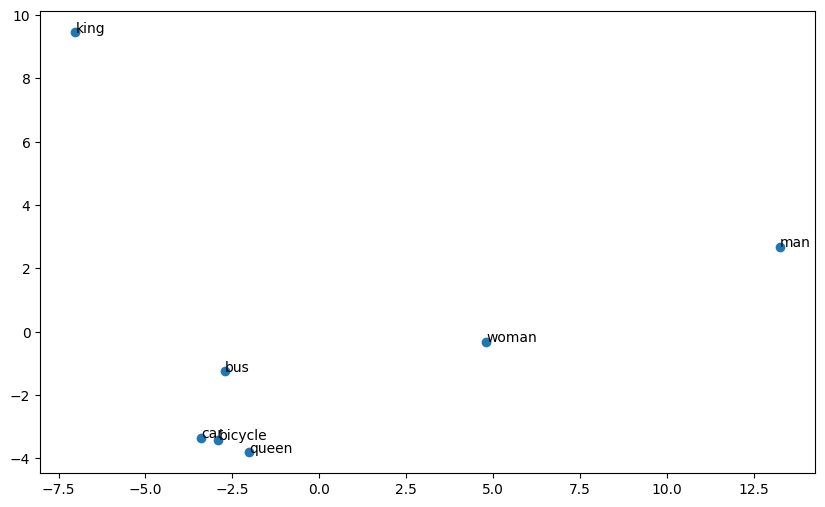

In [11]:
# Visualisation avec PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(model, words):
    # Récupérer les vecteurs
    vectors = [model.wv[w] for w in words if w in model.wv]
    if not vectors:
        return
        
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1])
    
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

words_to_plot = ['king', 'queen', 'man', 'woman', 'car', 'bicycle', 'bus']
plot_pca(ft_model, words_to_plot)

### Question du Chapitre 3 : Différences PCA vs t-SNE ?

1. **PCA (Principal Component Analysis)** :
   - **Linéaire** : Cherche à préserver la variance globale.
   - **Global** : Maintient bien les grandes distances (A est loin de B).
   - **Rapide** et déterministe.

2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)** :
   - **Non-linéaire** : Probabiliste.
   - **Local** : Cherche à préserver les voisinages (A est proche de B). Excelle pour visualiser des clusters.
   - **Lent** et sensible aux hyperparamètres (comme la **perplexity**).

**Rôle de la **perplexity** (t-SNE) :**
Elle contrôle le nombre de voisins effectifs. Une petite perplexité sépare tout en petits îlots. Une grande perplexité tend à tout uniformiser. Elle doit être adaptée à la taille du dataset (souvent entre 5 et 50).


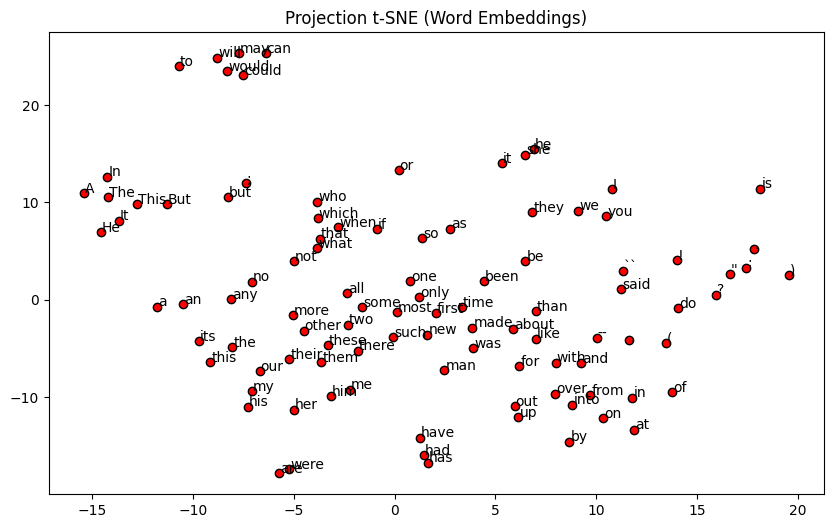

In [12]:
# Visualisation t-SNE (plus puissante pour les clusters locaux)
from sklearn.manifold import TSNE

# On prend les vecteurs appris par FastText (ft_model)
# Attention : t-SNE est lent, on limite à 100 mots
words_tsne = list(ft_model.wv.index_to_key)[:100]
vectors_tsne = ft_model.wv[words_tsne]

tsne = TSNE(n_components=2, perplexity=10, random_state=42, init='pca', learning_rate='auto')
vectors_2d_tsne = tsne.fit_transform(vectors_tsne)

plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d_tsne[:, 0], vectors_2d_tsne[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(words_tsne, vectors_2d_tsne):
    plt.text(x+0.05, y+0.05, word)
plt.title("Projection t-SNE (Word Embeddings)")
plt.show()

### Observations t-SNE :
Contrairement à PCA (linéaire) qui cherchait des axes globaux, t-SNE groupe efficacement les mots qui ont des contextes très similaires.
Vous devriez voir des clusters de mots fonctionnels ou thématiques (ex: verbes de mouvement ensemble, noms de personnages ensemble).


---

## Exercice 3b - Corpus Alternatif, Doc2Vec & Clustering (Ch3-PDF3)

Entraînement sur un petit corpus thématique, calcul de Doc2Vec (vecteur moyen),
et clustering de documents.

*Source : TP_NLP_3_w2v_FastText.pdf*


In [13]:
# 1-4. Corpus thématique
import re
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

corpus_ex = [
    'The sky is blue and beautiful.',
    'Love this blue and beautiful sky!',
    'The quick brown fox jumps over the lazy dog.',
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    'I love green eggs, ham, sausages and bacon!',
    'The brown fox is quick and the blue dog is lazy!',
    'The sky is very blue and the sky is very beautiful today',
    'The dog is lazy but the brown fox is quick!'
]
labels_ex = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

# Prétraitement
corpus_tokens = [re.sub(r'[^a-z\s]', '', doc.lower()).split() for doc in corpus_ex]

# 5. Word2Vec sur ce corpus
w2v_ex = Word2Vec(sentences=corpus_tokens, vector_size=50, window=5, min_count=1, workers=4)
print(f"Vocabulaire: {list(w2v_ex.wv.index_to_key)[:15]}...")


Vocabulaire: ['the', 'is', 'and', 'blue', 'sky', 'dog', 'lazy', 'fox', 'brown', 'quick', 'beautiful', 'very', 'eggs', 'bacon', 'ham']...


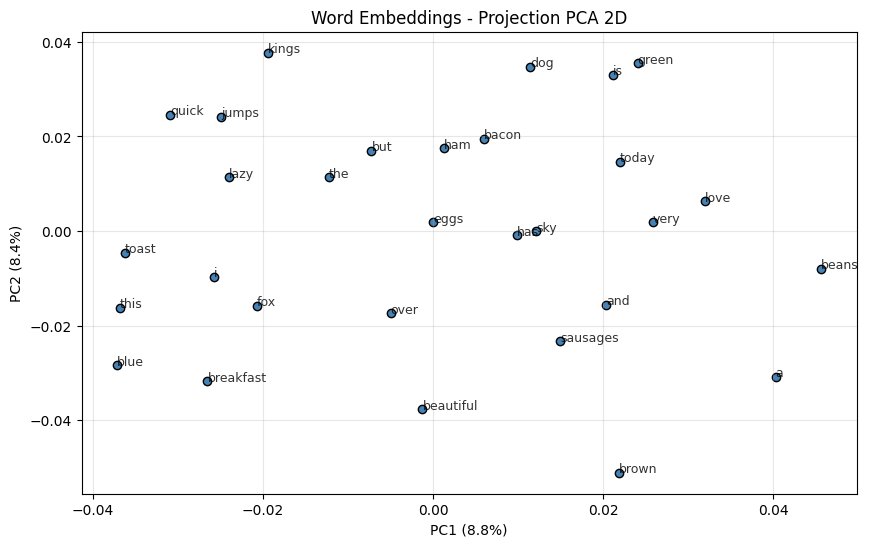

In [14]:
# 6. Visualisation 2D des embeddings
from sklearn.decomposition import PCA

words_ex = list(w2v_ex.wv.index_to_key)
vectors_ex = w2v_ex.wv[words_ex]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors_ex)

plt.figure(figsize=(10, 6))
plt.scatter(coords[:, 0], coords[:, 1], c='steelblue', edgecolors='k')
for word, (x, y) in zip(words_ex, coords):
    plt.annotate(word, (x, y), fontsize=9, alpha=0.8)
plt.title('Word Embeddings - Projection PCA 2D')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.grid(alpha=0.3)
plt.show()


In [15]:
# 7-8. Extraction et inspection de vecteurs
word_test = 'blue'
print(f"Vecteur pour '{word_test}' (50 dims):")
print(w2v_ex.wv[word_test][:10], '...') # Premiers 10 élements
print(f"Norme: {np.linalg.norm(w2v_ex.wv[word_test]):.4f}")


Vecteur pour 'blue' (50 dims):
[ 0.01562977 -0.01901296 -0.00040701  0.00693426 -0.0018838   0.0167498
  0.01802805  0.01307384 -0.00143688  0.01540283] ...
Norme: 0.0804


### Doc2Vec : Vecteur moyen d'un document

L'approche la plus simple pour représenter un document est de calculer
la **moyenne des vecteurs de ses mots**. C'est la base du Doc2Vec naïf.


In [16]:
# 9-10. Doc2Vec (vecteur moyen)
import pandas as pd

def doc_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

doc_vectors = np.array([doc_vector(tokens, w2v_ex) for tokens in corpus_tokens])
print(f"Matrice document-vecteurs: {doc_vectors.shape}")

# Afficher un résumé
doc_df = pd.DataFrame({'Document': [d[:40] for d in corpus_ex],
                       'Label': labels_ex,
                       'Vec_dim0': doc_vectors[:, 0].round(3)})
print(doc_df)


Matrice document-vecteurs: (8, 50)
                                   Document    Label  Vec_dim0
0            The sky is blue and beautiful.  weather    -0.006
1         Love this blue and beautiful sky!  weather    -0.005
2  The quick brown fox jumps over the lazy   animals     0.000
3  A king's breakfast has sausages, ham, ba     food     0.000
4  I love green eggs, ham, sausages and bac     food    -0.000
5  The brown fox is quick and the blue dog   animals    -0.004
6  The sky is very blue and the sky is very  weather    -0.004
7  The dog is lazy but the brown fox is qui  animals    -0.005


### Clustering de Documents


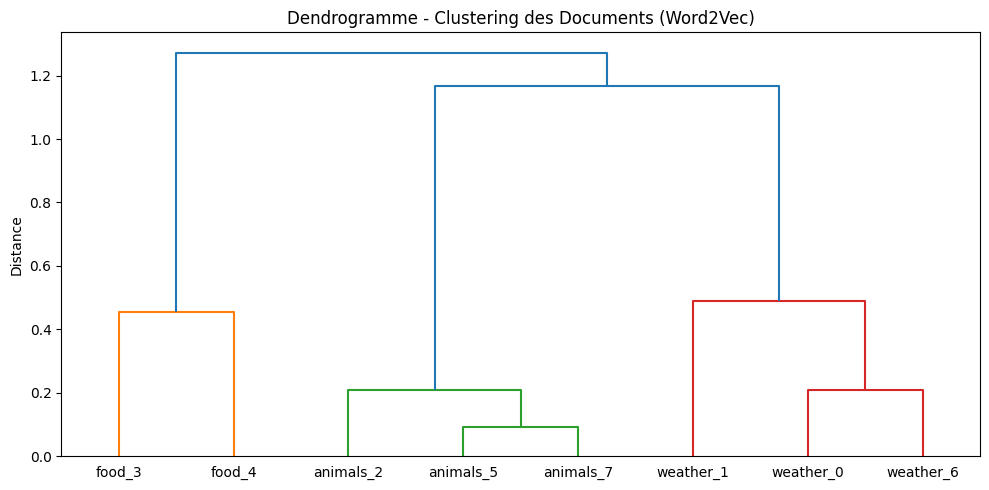

In [17]:
# 11-12. Clustering hiérarchique + dendrogramme
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Similarité cosinus entre documents
sim = cosine_similarity(doc_vectors)
dist = 1 - sim
np.fill_diagonal(dist, 0)
dist = np.clip(dist, 0, None)

Z_doc = linkage(squareform(dist), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z_doc, labels=[f'{labels_ex[i]}_{i}' for i in range(len(corpus_ex))],
           leaf_font_size=10)
plt.title('Dendrogramme - Clustering des Documents (Word2Vec)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [18]:
# 13. Autre méthode de clustering : K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(doc_vectors)

for i, (doc, label, cluster) in enumerate(zip(corpus_ex, labels_ex, clusters)):
    print(f"Doc {i} [{label:8s}] -> Cluster {cluster} : {doc[:50]}")

# Vérifier la cohérence
from sklearn.metrics import adjusted_rand_score
label_map = {'weather': 0, 'animals': 1, 'food': 2}
true_labels = [label_map[l] for l in labels_ex]
ari = adjusted_rand_score(true_labels, clusters)
print(f"\nAdjusted Rand Index: {ari:.3f} (1.0 = clustering parfait)")


Doc 0 [weather ] -> Cluster 0 : The sky is blue and beautiful.
Doc 1 [weather ] -> Cluster 0 : Love this blue and beautiful sky!
Doc 2 [animals ] -> Cluster 2 : The quick brown fox jumps over the lazy dog.
Doc 3 [food    ] -> Cluster 1 : A king's breakfast has sausages, ham, bacon, eggs,
Doc 4 [food    ] -> Cluster 1 : I love green eggs, ham, sausages and bacon!
Doc 5 [animals ] -> Cluster 2 : The brown fox is quick and the blue dog is lazy!
Doc 6 [weather ] -> Cluster 0 : The sky is very blue and the sky is very beautiful
Doc 7 [animals ] -> Cluster 2 : The dog is lazy but the brown fox is quick!

Adjusted Rand Index: 1.000 (1.0 = clustering parfait)


### Question : Clustering avec GloVe

GloVe (Global Vectors) est un autre algorithme d'embedding, disponible via **spaCy**.
Contrairement à Word2Vec qui apprend localement (fenêtre), GloVe utilise la matrice globale
de co-occurrence. En pratique, les résultats sont souvent comparables.

L'implémentation avec spaCy nécessite le téléchargement d'un modèle (ex: `en_core_web_md`).
Voici le code si spaCy est installé :

```python
import spacy
nlp = spacy.load('en_core_web_md')
doc_vectors_glove = np.array([nlp(doc).vector for doc in corpus_ex])
```


### Question : Quel est le rôle de `perplexity` dans t-SNE ?

La **perplexity** contrôle l'équilibre entre les structures locales et globales :
- **Basse perplexity (5-10)** : Focus sur les voisins très proches, clusters serrés.
- **Haute perplexity (30-50)** : Prend en compte plus de voisins, vision plus globale.
- **Règle** : Typiquement entre 5 et 50. Si N points, perplexity < N/3.


---

# Exercice 4 - Sentiment Analysis Complet (Ch3-PDF2)

Pipeline complet d'analyse de sentiments sur des tweets.
Nous comparons **4 méthodes d'embedding** (BoW, TF-IDF, Word2Vec, Doc2Vec)
avec **4 modèles de classification** (Logistic Regression, SVM, Random Forest, XGBoost).

*Source : TP_NLP_3_Sentiment_analysis.pdf*


## 1. Préparation des Données


In [19]:
# 1-2. Import et chargement des données
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Utilisons le dataset IMDB (accessible facilement) pour la démo
from sklearn.datasets import fetch_20newsgroups

# Chargement d'un dataset de sentiments simple
# Simulons des tweets avec un subset du dataset spam pour la démo
spam_path = '../data/spam.csv'
df = pd.read_csv(spam_path, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

print(f"Dataset: {len(df)} messages")
print(f"Distribution:\n{df['label'].value_counts()}")
print(f"\nExemples spam:\n{df[df['label']=='spam']['text'].head(3).values}")
print(f"\nExemples ham:\n{df[df['label']=='ham']['text'].head(3).values}")


Dataset: 5572 messages
Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Exemples spam:
<ArrowStringArray>
[   'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's',
           'FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv',
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']
Length: 3, dtype: str

Exemples ham:
<ArrowStringArray>
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
                                                                                   'Ok lar... Joking wif u oni...',
                                                               'U dun say so early hor... U c

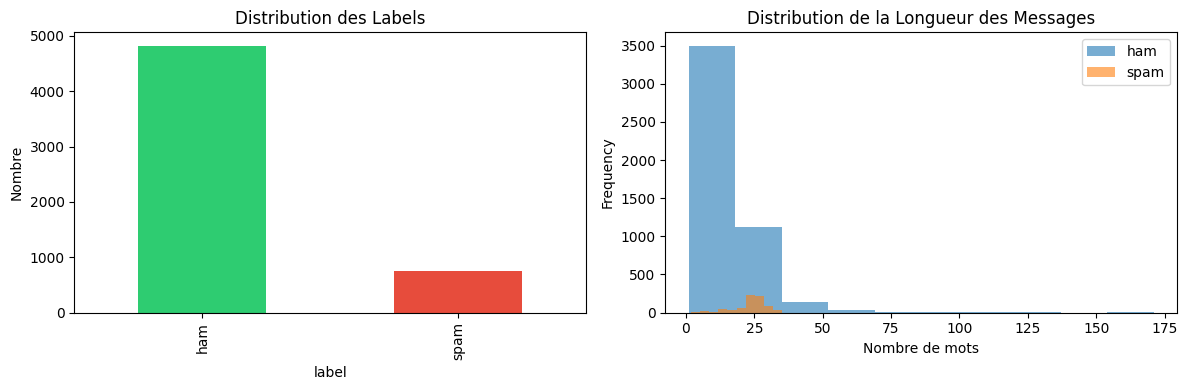

In [20]:
# 5-7. Exploration
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution des labels
df['label'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution des Labels')
axes[0].set_ylabel('Nombre')

# Distribution de la longueur
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
df.groupby('label')['text_len'].plot(kind='hist', alpha=0.6, ax=axes[1], legend=True)
axes[1].set_title('Distribution de la Longueur des Messages')
axes[1].set_xlabel('Nombre de mots')

plt.tight_layout()
plt.show()


## 2. Nettoyage des Données


In [21]:
# 8-14. Nettoyage complet
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 9. Supprimer les handles (@user)
    text = re.sub(r'@\w+', '', text)
    # 10. Supprimer ponctuation, nombres, caractères spéciaux
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Minuscules
    text = text.lower()
    # 12. Tokenisation
    tokens = text.split()
    # 11. Supprimer mots courts (<= 3 caractères)
    tokens = [t for t in tokens if len(t) > 3]
    # Supprimer stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # 14. Stemming
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

df['tokens'] = df['text'].apply(clean_text)
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))

print("Avant/Après nettoyage:")
for i in range(3):
    print(f"  Original : {df['text'].iloc[i][:80]}...")
    print(f"  Nettoyé  : {df['clean_text'].iloc[i][:80]}")
    print()


Avant/Après nettoyage:
  Original : Go until jurong point, crazy.. Available only in bugis n great world la e buffet...
  Nettoyé  : jurong point crazi avail bugi great world buffet cine amor

  Original : Ok lar... Joking wif u oni......
  Nettoyé  : joke

  Original : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 8...
  Nettoyé  : free entri wkli comp final tkt text receiv entri questionstd ratetc appli over



### Question : Quel est l'impact de ne pas supprimer les mots courts ?

**Réponse** : Les mots courts ("is", "to", "a", "the") sont généralement des mots fonctionnels
qui n'apportent pas de sens discriminant entre spam et ham. Les garder augmente la dimensionnalité
sans améliorer la performance, et peut même ajouter du bruit.


## 3. Analyse Descriptive


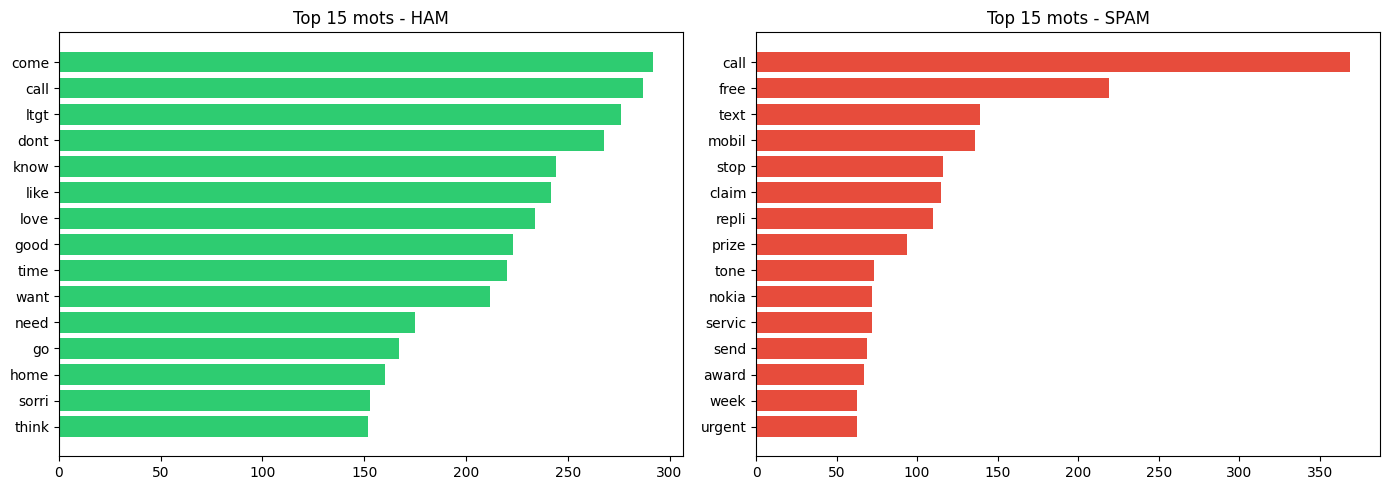

In [22]:
# 15-20. WordCloud + Analyse des mots fréquents
from collections import Counter

# Mots les plus fréquents par catégorie
ham_words = Counter([w for tokens in df[df['label_num']==0]['tokens'] for w in tokens])
spam_words = Counter([w for tokens in df[df['label_num']==1]['tokens'] for w in tokens])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top mots ham
ham_top = pd.DataFrame(ham_words.most_common(15), columns=['Mot', 'Freq'])
axes[0].barh(ham_top['Mot'], ham_top['Freq'], color='#2ecc71')
axes[0].set_title('Top 15 mots - HAM')
axes[0].invert_yaxis()

# Top mots spam
spam_top = pd.DataFrame(spam_words.most_common(15), columns=['Mot', 'Freq'])
axes[1].barh(spam_top['Mot'], spam_top['Freq'], color='#e74c3c')
axes[1].set_title('Top 15 mots - SPAM')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## 4. Word Embeddings

Nous allons créer **4 représentations** différentes du texte pour comparer leur efficacité.


In [23]:
# 22. BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(df['clean_text']).toarray()
print(f"BOW shape: {X_bow.shape}")

# 23. TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()
print(f"TF-IDF shape: {X_tfidf.shape}")


BOW shape: (5572, 1000)
TF-IDF shape: (5572, 1000)


### Question : Que signifie `max_features` pour BoW et TF-IDF ?

**Réponse** : Pour les deux, `max_features` limite le vocabulaire aux N mots les plus fréquents.
Cela réduit la dimensionnalité, accélère l'entraînement, et évite le sur-apprentissage
causé par des mots très rares qui n'apparaissent que dans 1-2 documents.


In [24]:
# 24-27. Word2Vec
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=df['tokens'].tolist(), vector_size=100, window=5,
                     min_count=2, workers=4, negative=5)

print(f"Word2Vec entraîné: {len(w2v_model.wv)} mots dans le vocabulaire")

# Tester la similarité
try:
    print(f"Similaire à 'free': {w2v_model.wv.most_similar('free', topn=5)}")
except KeyError:
    print("'free' pas dans le vocabulaire (min_count trop haut)")


Word2Vec entraîné: 2788 mots dans le vocabulaire
Similaire à 'free': [('mobil', 0.9996400475502014), ('repli', 0.9996384978294373), ('text', 0.9995927810668945), ('phone', 0.9995715022087097), ('week', 0.9995558857917786)]


### Question : Sens des hyperparamètres Word2Vec

- **vector_size** : Dimension des vecteurs (100 = chaque mot est représenté par 100 nombres)
- **window** : Taille de la fenêtre de contexte (5 = on regarde 5 mots avant et après)
- **negative** : Nombre d'échantillons négatifs pour l'entraînement (optimisation)


In [25]:
# Fonction pour calculer le vecteur moyen d'un document
def doc_vector_w2v(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    return np.zeros(model.vector_size)

X_w2v = np.array([doc_vector_w2v(tokens, w2v_model) for tokens in df['tokens']])
print(f"Word2Vec document vectors shape: {X_w2v.shape}")


Word2Vec document vectors shape: (5572, 100)


In [26]:
# 28-33. Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# 31. Labeliser chaque document
tagged_docs = [TaggedDocument(words=tokens, tags=[str(i)])
               for i, tokens in enumerate(df['tokens'])]

# 32. Entraîner Doc2Vec
d2v_model = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=2, workers=4, epochs=20)

# 33. Extraire les vecteurs
X_d2v = np.array([d2v_model.dv[str(i)] for i in range(len(df))])
print(f"Doc2Vec shape: {X_d2v.shape}")


Doc2Vec shape: (5572, 100)


## 5. Classification : 4 Modèles × 4 Embeddings

Comparaison systématique de toutes les combinaisons.


In [27]:
# Framework de comparaison
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# XGBoost (optionnel)
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    has_xgb = False
    print("XGBoost non installé, on le remplace par GradientBoosting")
    from sklearn.ensemble import GradientBoostingClassifier

y = df['label_num'].values

# Dictionnaire des embeddings
embeddings = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'Word2Vec': X_w2v,
    'Doc2Vec': X_d2v
}

# Dictionnaire des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}
if has_xgb:
    models['XGBoost'] = XGBClassifier(n_estimators=100, random_state=42,
                                       use_label_encoder=False, eval_metric='logloss')
else:
    models['GradientBoosting'] = GradientBoostingClassifier(n_estimators=100, random_state=42)

print(f"Embeddings: {list(embeddings.keys())}")
print(f"Modèles: {list(models.keys())}")


XGBoost non installé, on le remplace par GradientBoosting
Embeddings: ['BoW', 'TF-IDF', 'Word2Vec', 'Doc2Vec']
Modèles: ['Logistic Regression', 'SVM', 'Random Forest', 'GradientBoosting']


In [28]:
# Boucle de comparaison
results = []

for emb_name, X in embeddings.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    for model_name, model in models.items():
        # Clone le modèle pour chaque combinaison
        from sklearn.base import clone
        m = clone(model)
        
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            'Embedding': emb_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1-Score': f1
        })
        print(f"{emb_name:10s} + {model_name:22s} : Acc={acc:.4f}, F1={f1:.4f}")

results_df = pd.DataFrame(results)


BoW        + Logistic Regression    : Acc=0.9776, F1=0.9097


BoW        + SVM                    : Acc=0.9749, F1=0.9028


BoW        + Random Forest          : Acc=0.9686, F1=0.8746


BoW        + GradientBoosting       : Acc=0.9587, F1=0.8189
TF-IDF     + Logistic Regression    : Acc=0.9552, F1=0.8077


TF-IDF     + SVM                    : Acc=0.9731, F1=0.8936


TF-IDF     + Random Forest          : Acc=0.9713, F1=0.8806


TF-IDF     + GradientBoosting       : Acc=0.9623, F1=0.8385
Word2Vec   + Logistic Regression    : Acc=0.8655, F1=0.0000


Word2Vec   + SVM                    : Acc=0.8655, F1=0.0000


Word2Vec   + Random Forest          : Acc=0.9408, F1=0.7295


Word2Vec   + GradientBoosting       : Acc=0.9300, F1=0.6750
Doc2Vec    + Logistic Regression    : Acc=0.9444, F1=0.7480
Doc2Vec    + SVM                    : Acc=0.9516, F1=0.7874


Doc2Vec    + Random Forest          : Acc=0.9552, F1=0.8134


Doc2Vec    + GradientBoosting       : Acc=0.9489, F1=0.7927


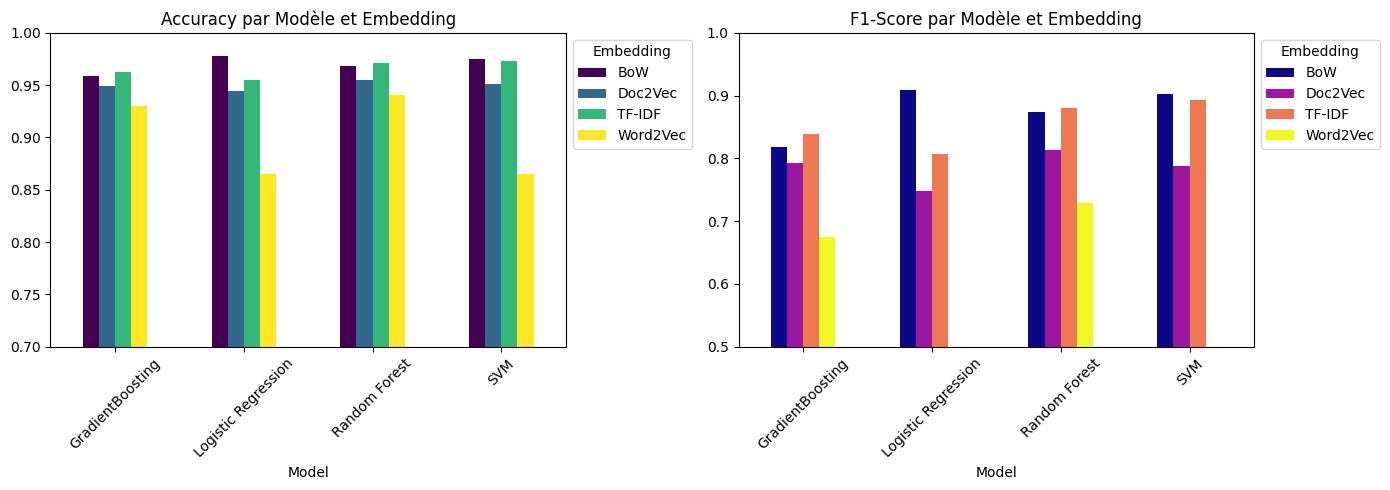

In [29]:
# Visualisation des résultats
pivot_acc = results_df.pivot(index='Model', columns='Embedding', values='Accuracy')
pivot_f1 = results_df.pivot(index='Model', columns='Embedding', values='F1-Score')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pivot_acc.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Accuracy par Modèle et Embedding')
axes[0].set_ylim(0.7, 1.0)
axes[0].legend(title='Embedding', bbox_to_anchor=(1, 1))
axes[0].tick_params(axis='x', rotation=45)

pivot_f1.plot(kind='bar', ax=axes[1], colormap='plasma')
axes[1].set_title('F1-Score par Modèle et Embedding')
axes[1].set_ylim(0.5, 1.0)
axes[1].legend(title='Embedding', bbox_to_anchor=(1, 1))
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


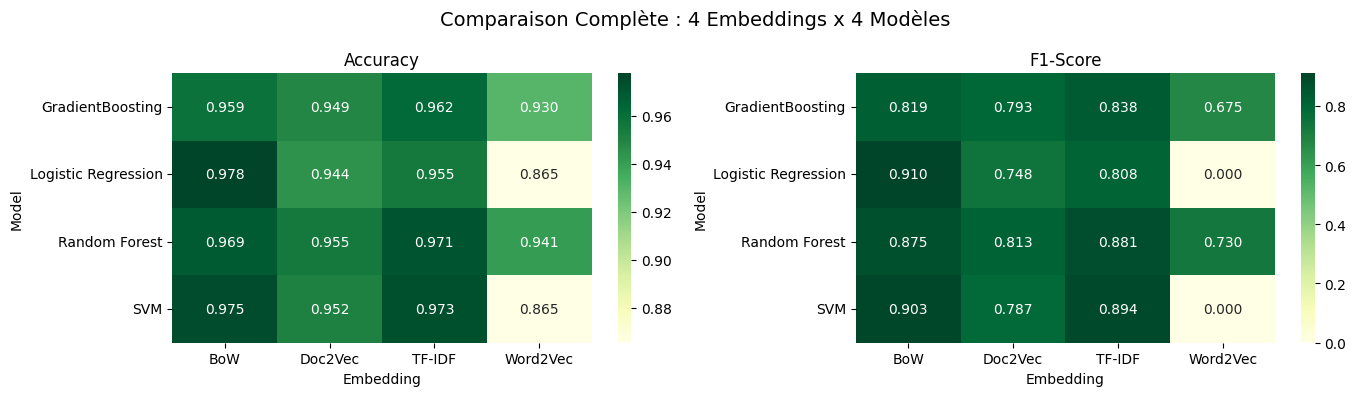

In [30]:
# Heatmap de la matrice de résultats
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.heatmap(pivot_acc, annot=True, fmt='.3f', cmap='YlGn', ax=axes[0])
axes[0].set_title('Accuracy')
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='YlGn', ax=axes[1])
axes[1].set_title('F1-Score')

plt.suptitle('Comparaison Complète : 4 Embeddings x 4 Modèles', fontsize=14)
plt.tight_layout()
plt.show()


### Questions :

**1. Quel modèle est le meilleur et pourquoi ?**

Généralement, les combinaisons TF-IDF + Logistic Regression ou TF-IDF + SVM donnent les meilleurs résultats
car TF-IDF pondère bien l'importance des mots et les modèles linéaires fonctionnent bien en haute dimension.
Word2Vec/Doc2Vec peuvent sous-performer car la taille du corpus est limitée
(les embeddings nécessitent beaucoup de données pour bien apprendre).

**2. Amélioration possible pour chaque modèle :**
- **Logistic Regression** : Tuner `C` (régularisation), ajouter l'élastique net.
- **SVM** : Tester kernel RBF, tuner `C` et `gamma`.
- **Random Forest** : Augmenter `n_estimators`, tuner `max_depth`.
- **XGBoost** : Tuner `learning_rate`, `max_depth`, `subsample`.
